# Processo di Bernoulli

Il processo di bernulli consiste nell'estrazione casuale di un risultato che può avere due valori.

Esempio: estrarre una pallina bianca o rossa da una boccia piena di $B$ palline bianche e $R$ palline rosse.

Secondo la definizione di probabilità classica, la probabilità di estrarre una pallina rossa è uguale al rapporto tra il numero di casi favorevoli ($R$) ed il numero totale di casi ($R+B$):

$p = \frac{\displaystyle R}{\displaystyle R+B}$

La probabilità di un evento negativo (pallina bianca) è ovviamente dato da:

$q = \frac{\displaystyle B}{\displaystyle R+B} = 1 - p$

In sostanza, lo spazio degli eventi $\Omega$ ha due possibili valori: $B$ e $R$ con probabilità $P(B)=q$ e $P(R)=p$. Risulta $P(\Omega)=P(B)+P(R)=1$ (condizione normalizzazione).

<img style="width: 200px" src="img/bernoulli.png">

<span style="color: blue">La distribuzione di Bernoulli è il modello per la risposta di **un rivelatore che ha un'efficienza $\varepsilon=p$** non ideale (ossia: $\varepsilon<1$). Il risultato a due valori, 0 o 1, corrisponde a un segnale mancato o rilvelato al passaggio di una particella.
</span>

In [17]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np

In [18]:
p = 0.3
p0 = bernoulli.pmf(0,p)
p1 = bernoulli.pmf(1,p)
print("p(0): ", p0)
print("p(1): ", p1)

p(0):  0.7000000000000001
p(1):  0.3


Esempio: generare casualmente 100 eventi di Bernoulli:

In [19]:
r = bernoulli.rvs(p, size=100)
r

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

Potremmo scrivere semplicemente un'implementazione alternativa alla liberia di python di una variabile di Bernoulli casuale:

In [20]:
import random

In [21]:
def rnd_bernoulli(p):
    r = random.random()
    if r<p: return 1
    else: return 0

In [22]:
rnd_bernoulli(0.3)

0

In [23]:
rnd_bernoulli(0.3)

0

In [24]:
rnd_bernoulli(0.3)

0

In [25]:
rnd_bernoulli(0.3)

0

In [35]:
x = [0,1]
y = [0,0]
p = 0.3
y = [bernoulli.pmf(n, p) for n in x]

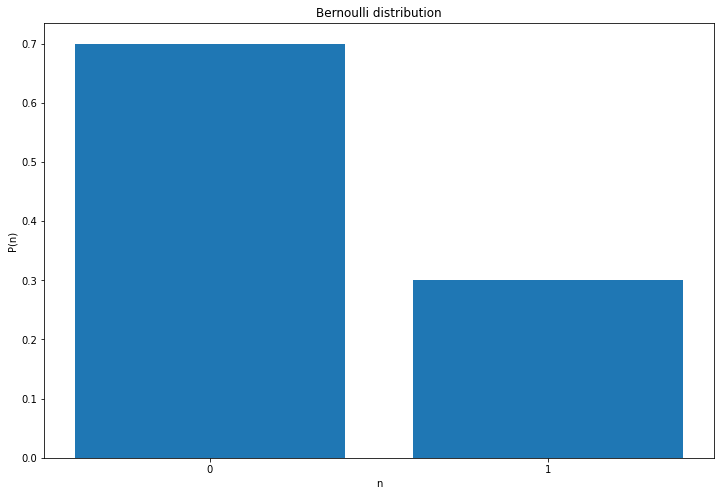

In [39]:
plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xticks(x)
plt.title('Bernoulli distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.show()

# Esempi di applicazione concreta del processo di Bernoulli:

* Uno studente supera un esame con una certa probabilità $p$
* Un calciatore segna un rigore con una certa probabilità $p$
* Un rivelatore dà un segnale a passaggio di una particella con probabilità $\varepsilon= p$.

# Processo Binomiale

Una variabile casuale binomiale è data dalla somma di $n$ variabili di Bernoulli *indipendenti*, ciascuna con la stessa probabilità $p$.

Quindi: dopo $N$ estrazioni *indipendenti* si conta il numero $n$ di palline rosse estratte.

La sequenza di estrazione segue uno dei possibli rami di un albero, come indicato nella figura che segue.

<img style="width: 500px" src="img/binomial.png">

Il numero di casi possibile per ciascuno dei possibili risultati diventa quindi pari al coefficiente della potenza di un binomio:

$\left(\begin{array}{c} N \\ n \end{array}\right) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}$

Considerando che ad ogni biforcazione la probabilità può essere $p$ oppure $q=1-p$, a seconda se l'esito sia positivo (pallina rossa) oppure negativo (pallina bianca), la probabilità di avere un numero $n$ di esiti positivi (ossia $n$ palline rosse estratte) è pari a:

$P(n;N, p) = \left(\begin{array}{c} n \\ N \end{array}\right) p^n(1-p)^{N-n} = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

<span style="color:green;">Nota sulla notazione: gli statistici professionisti indicano le variabili casuali con la lettera maiuscola, mentre possibili valori particolari della variabile casuale sono indicati con la minuscola. Questa notazione per qualche motivo appare particolarmente antiestetica ai fisici, per cui non la userò.</span>

<span style="color:blue;">Corollario: la distribuzione di $N-n$ è una binomiale con parametri $N$ e $1-p$.</span>

<span style="color: blue">La distribuzione binomiale è il modello per il numero di conteggi di **un rivelatore che ha un'efficienza $\varepsilon=p$** non ideale (ossia: $\varepsilon<1$). Il numero di conteggi $n$ rispetto al numero totale di particelle che attraversano il rivelatore, $N$, segue la distribuzione binomiale. Il numero di rigori segnati da un calciatore durante una stagione si potrebbe modellizzare con la distribuzione binomiale, assumendo per semplicità che la probabilità $p$ di segnare sia uguale durante tutto il campionato, e quindi che ciascun rigore sia il risultato casuale di un processo di Bernoulli con probabilità $p$.
</span>

In [14]:
from scipy.stats import binom

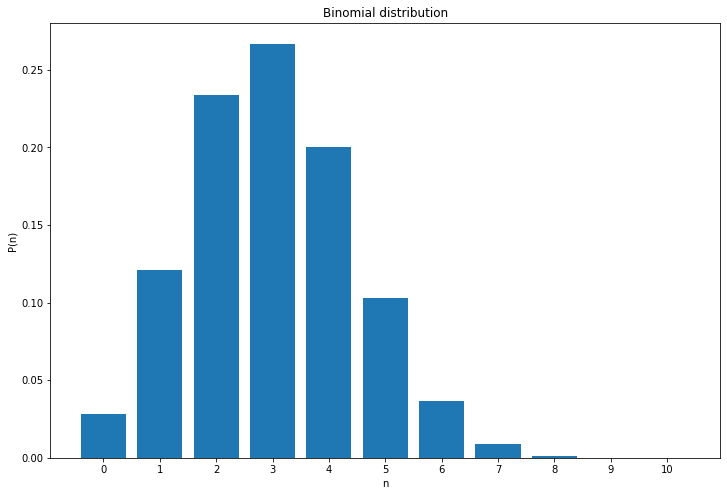

In [40]:
plt.figure(figsize=(12,8))
p = 0.3
N = 10
x = list(range(N+1))
y = [binom.pmf(n, N, p) for n in x]
plt.bar(x,y)
plt.xticks(x)
plt.title('Binomial distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.show()

# Esempi di applicazione concreta del processo binomiale:
* Su $N=20\,000$ vaccinati, $n$ sono immunizzati
* Su $N=100$ fotoni, o qualsiasi altro tipo di particelle, un rivelatore ne rileva $n$
* In una stagione, un giocatore segna $n$ rigori su $N$ assegnati

# Distribuzione di Poisson
La distribuzione di Poisson si ottiene come limite della distrubuzione binomiale per $N\rightarrow\infty$.
Se $N\rightarrow\infty$, anche il numero di estrazioni di risultati positivi $n$ tenderà ad assumere valori divergenti, a meno che $p$ non tende a zero in conseguenza alla divergenza di $N$. Per questo, si può assumere che $\nu=pN$ resti costante. In questo caso, la distribuzione binomiale: 

$P(n; N, p) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

Diventa:

$P(n;\nu) = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}{\left(\frac{\displaystyle\nu}{\displaystyle N}\right)}^n\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{N-n}$


$P(n;\nu) = \frac{\displaystyle \nu^N}{\displaystyle n!}
\,\frac{\displaystyle N!}{\displaystyle (N-n)! N^n}
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^N
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{-n}$

$P(n;\nu) = \frac{\displaystyle \nu^n}{\displaystyle N!}
\,\frac{\displaystyle N (N-1)\cdots (N-n-1)}{\displaystyle N^n}
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^N
\left(1-\frac{\displaystyle\nu}{\displaystyle N}\right)^{-n}$

Per $N\rightarrow\infty$, il primo termine resta costante, mentre gli altri tre tendono rispettivamente a:
* 1 (al numeratore ci sono $n$ termini, tutti che tendono a $N$
* $e^{-\nu}$ (si tratta di un limite notevole)
* 1 (il secondo termine in parentesi tende a zero)

La distribuzione diventa quindi:

$P(n;\nu) = \frac{\displaystyle \nu^n e^{-\nu}}{\displaystyle N!}$

<span style="color: blue">La distribuzione di Poisson è il modello per il numero di conteggi di un rivelatore di particelle. Il numero di conteggi $n$ acquisito in un certo tempo in cui il numero atteso di conteggio è $\nu$, segue la distribuzione binomiale. Questo si può applicare ad un rivelatore che regista raggi cosmici oppure particelle prodotte ad un acceleratore. Il numero atteso di conteggi $\nu$ si può confrontare con le previsioni di un modello teorico, se disponibile.
</span>

In [32]:
from scipy.stats import poisson

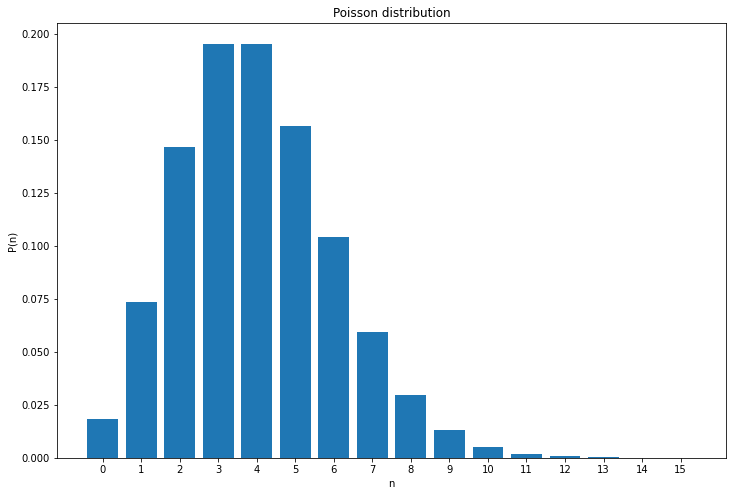

In [41]:
plt.figure(figsize=(12,8))
nu = 4
N = 15
x = list(range(N+1))
y = [poisson.pmf(n, nu) for n in x]
plt.bar(x,y)
plt.xticks(x)
plt.title('Poisson distribution')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.show()

Proviamo un confronto numerico

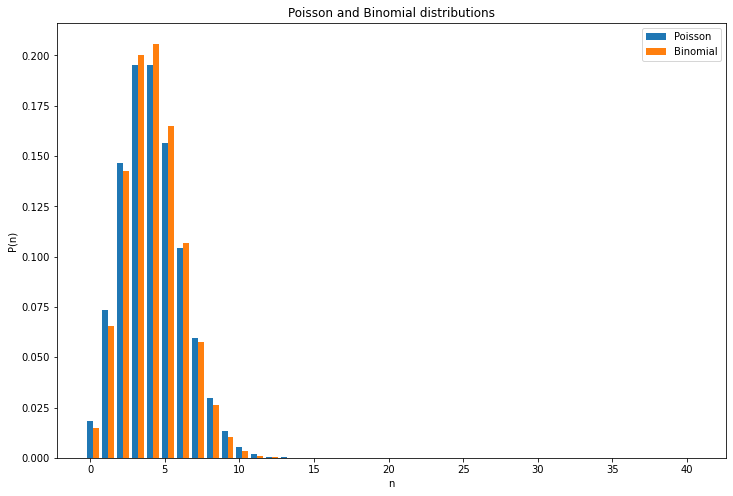

In [43]:
plt.figure(figsize=(12,8))
p = 0.1
N = 40
nu = p*N
x = np.arange(N+1)
y1 = [poisson.pmf(n, nu) for n in x]
y2 = [binom.pmf(n, N, p) for n in x]
width = 0.4
plt.bar(x,y1,width,label='Poisson')
plt.bar(x+width,y2,width,label='Binomial')
#plt.yscale('log')
plt.title('Poisson and Binomial distributions')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
plt.show()

Vedremo che esiste un modo più semplice per ottenere la distribuzione di Poisson partendo da una distribuzione uniforme.
Ma dobbiamo prima introdurre in modo più sistematico le distribuzioni di probabilità in particolare nel caso continuo.

# Esempi di applicazione concreta del processo di Poisson:
* Numero di morti in un giorno in Italia. Il processo è chiaramente binomiale ($N\simeq 60.000.000$), ma la probabilità $p$ è talmente piccola che $N$ si può considerare infinito. Il numero di morti al giorno $\nu$ vale circa $1.500$.
* Numero di gocce di pioggia che cade in un secchio in un minuto.
* Numero di raggi cosmici che attraversano un rivelatore in un minuto.

Sono tutti casi in cui il tasso degli eventi di interesse è noto e non c'è un limite superiore, almento in teoria, al numero di casi che si possono osservare.